In [1]:
from sympy import *
import sympy.stats as st

import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

Har en modell som består av $(Z,\mathscr{P}_{\theta}=\{P_{\theta}:\theta \in \Theta\})$.

Antar at $X_1,...,X_N \overset{iid}{\sim} \mathcal{L}(X)=P_{\theta_0}$. Observerer realiseringene $X_n = x_n \in Z$ for $n=1,2,...,N$. På bakgrunn av dette vil jeg si noe om verdien til den sanne, ukjente parameteren $\theta_0$ i fordelingen som genererte utvalget.

Jeg begynner først med å se på hva jeg kan lære fra en enkelt observasjon og deretter skal jeg se på hvordan vi systematisk kan kombinere informasjon fra ulike kilder. Likelihoodfunksjon til en generisk observasjon $X_n$, også betegnet som likelihood bidraget, kan defineres som: 
$L_n(\theta) := L_n(\theta,X) := f_{\theta}(X)$
der $f$ kan være pmf/pdf.

Hver realisert verdi av $X_n$ gir en funksjon $L_n:\Theta \mapsto \mathbb{R}$. Skal se på noen realisering fra bernoulli.

In [2]:
x, θ = symbols('x θ',positive=True)
X = st.Bernoulli('X',θ)
pmf = st.density(X).pmf
L = pmf(1)**x*pmf(0)**(1-x)
L

θ**x*(1 - θ)**(1 - x)

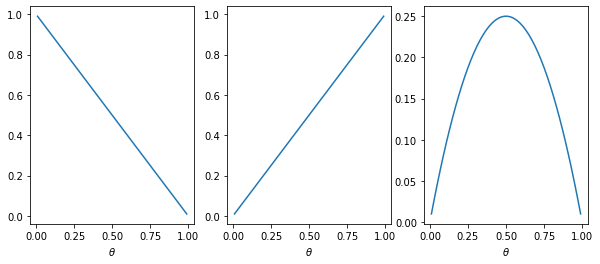

In [3]:
grid = np.linspace(0.01,0.99)
L_0 = L.subs(x,0)
L_1 = L.subs(x,1)
L_N = L_0*L_1
likelihoods = [L_0,L_1,L_N]

fig, axes = plt.subplots(1,3,figsize=(10,4))
for i in range(3):
    f = lambdify(θ,likelihoods[i])
    axes[i].plot(grid, f(grid))
    axes[i].set_xlabel(r'$\theta$')

Dette var eksempel på de to realiseringene som er mulig fra bernoulli og kombinasjon av disse. Hvor sannsynlig hver av realiseringene er avhenger av parameter i fordeling som genererer $X$ som vi observerer. Hvis $\theta_0 > 0.5$ ser vi flest av den andre likelihoodfunksjonen. Lar nå $\theta_0 = 0.7$ og plotter litt realiseringer. eller.. det blir bare mange overlappene linjer så dropper den LOL.

For hver $\theta$ har $L(\theta)$ en fordeling. Siden $X$ bare tar to verdier så tar denne fordelingen også bare to verdier. La oss så på noen av disse fordelingene.

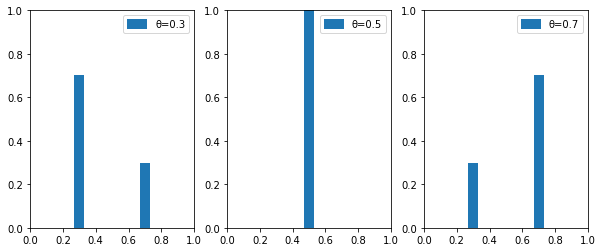

In [4]:
N = 10000
obs = stats.bernoulli(0.70).rvs(N)

θ_vals = (0.3, 0.5, 0.7)
fig, axes = plt.subplots(1,3,figsize=(10,4))
for i in range(3):
    f = lambdify(x,L.subs(θ,θ_vals[i]))
    y = f(obs)
    unique, counts = np.unique(y,return_counts=1)
    counts = counts/sum(counts)
    axes[i].vlines(unique,0,counts,lw=10,color='tab:blue',label=f'θ={θ_vals[i]}')
    axes[i].set(xlim=(0,1),ylim=(0,1))
    axes[i].legend()

Okay, har fordeling for hver $\theta$ både er en teoretisk størrelse definert fra $P_{\theta_0}$ og også noe jeg fysisk kan observere som relativ frekvenser fra mange observerte realiseringer av fordelingen. Vil bruke fordelingen jeg observerer til å si hva jeg tror verdien av $\theta_0$ er. En måte å tenke på dette er å maksimere forventet likelihood. skal prøve å plotte denne kurven.

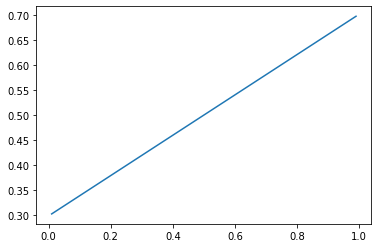

In [5]:
M = 100
θ_grid = np.linspace(0.01,0.99,M)
exp_L = np.empty(M)
for m in range(M):
    f = lambdify(x,L.subs(θ,θ_grid[m]))
    y = f(obs)
    unique, counts = np.unique(y,return_counts=1)
    freq = counts/N
    exp_L[m] = sum(unique*freq)

plt.plot(θ_grid,exp_L)

okay, hadde forventet at den toppet seg i 0.7, men ser at dette gir mening. Like mye tyngde på hvert av utfallene, så blir jo fordel av å flytte det mest sannsynlige utfall mot høyre, altså velge større $\theta$. Gjelder så lengde $\theta_0>0.5$. Okay, ser at det kanskje ikke er så meningsfult å tegne expected likelihood function, $h:\theta\mapsto E_{\theta_0}[L(\theta,X)]$?

Ser at det fungerer på loglikelihood... litt usikker på dette

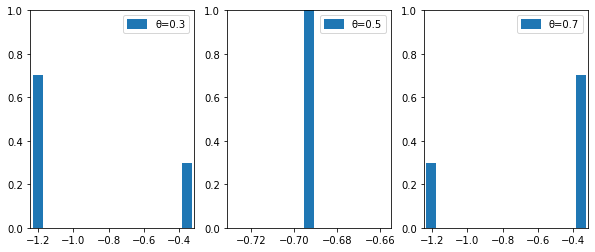

In [6]:
logL = log(L)
θ_vals = (0.3, 0.5, 0.7)
fig, axes = plt.subplots(1,3,figsize=(10,4))
for i in range(3):
    f = lambdify(x,logL.subs(θ,θ_vals[i]))
    y = f(obs)
    unique, counts = np.unique(y,return_counts=1)
    counts = counts/sum(counts)
    axes[i].vlines(unique,0,counts,lw=10,color='tab:blue',label=f'θ={θ_vals[i]}')
    axes[i].set(ylim=(0,1))
    axes[i].legend()

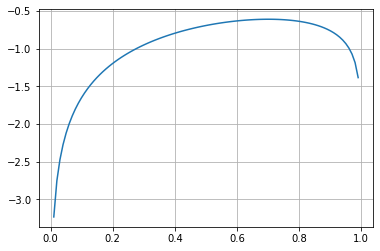

In [7]:
M = 100
θ_grid = np.linspace(0.01,0.99,M)
exp_L = np.empty(M)
for m in range(M):
    f = lambdify(x,logL.subs(θ,θ_grid[m]))
    y = f(obs)
    unique, counts = np.unique(y,return_counts=1)
    freq = counts/N
    exp_L[m] = sum(unique*freq)

plt.plot(θ_grid,exp_L)
plt.grid()

Vil nå gjøre tilsvarende visualiseringer fra score-funksjonen

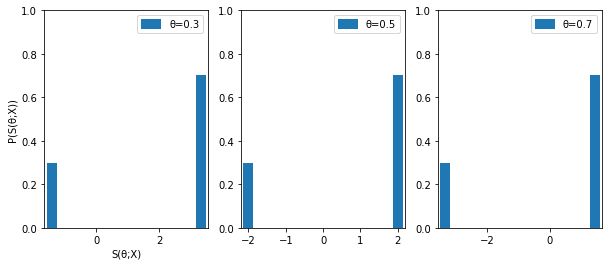

In [8]:
score = diff(logL,θ)
θ_vals = (0.3, 0.5, 0.7)
fig, axes = plt.subplots(1,3,figsize=(10,4))
for i in range(3):
    f = lambdify(x,score.subs(θ,θ_vals[i]))
    y = f(obs)
    unique, counts = np.unique(y,return_counts=1)
    counts = counts/sum(counts)
    axes[i].vlines(unique,0,counts,lw=10,color='tab:blue',label=f'θ={θ_vals[i]}')
    axes[i].set(ylim=(0,1))
    axes[i].legend()
    axes[0].set(xlabel='S(θ;X)', ylabel='P(S(θ;X))')

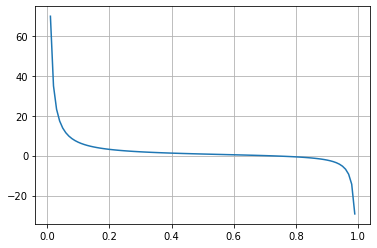

In [9]:
M = 100
θ_grid = np.linspace(0.01,0.99,M)
exp_L = np.empty(M)
for m in range(M):
    f = lambdify(x,score.subs(θ,θ_grid[m]))
    y = f(obs)
    unique, counts = np.unique(y,return_counts=1)
    freq = counts/N
    exp_L[m] = sum(unique*freq)

plt.plot(θ_grid,exp_L)
plt.grid()

Okay, har nå fått ting som gir mening så lenge jeg holder meg til loglikelihood... skal nå prøve å få til noe av det samme med symbols matte i stedet for numerisk..

In [10]:
L

θ**x*(1 - θ)**(1 - x)

In [11]:
logL

log(θ**x*(1 - θ)**(1 - x))

In [12]:
score.simplify()

(-x + θ)/(θ*(θ - 1))

$Z = \{0,1\}$. Vil vise at $E_{\theta}[S(\theta)]=0$. Merk at $E_{\theta_0}[S(\theta)]$ i prinsippet er en meningsfull størrelse som kan avvike fra 0.

In [13]:
exp = 0
for val in (0,1):
    exp += score.subs(x,val)*pmf(val)
exp.simplify()

0

Vil finne fisher info også. Deretter se om jeg får det samme numerisk fra mitt gitte utvalg dersom jeg ikek kjenner sann parameter.

In [14]:
# Fisher info fra gradient
FI_g = 0
for val in (0,1):
    FI_g += score.subs(x,val)**2*pmf(val)
FI_g.simplify()

-1/(θ*(θ - 1))

skal se at jeg kan få det fra negative av forventet andre derivert

In [15]:
# Fisher info fra hesse
FI_h = 0
hess = diff(score,θ)
for val in (0,1):
    FI_h -= hess.subs(x,val)*pmf(val)
FI_h.simplify()

-1/(θ*(θ - 1))

det derre kaller eg en banger. merk at ganske greit å ta forventnignsverdi til pmf så lenge eg har uttrykk for grid, siden det bare er å loope. Ganske fornøyd med teori der størrelser er funksjon av parameter. Finnes en eller annen sann verdi av denne som jeg i prinsippet kan plugge inn å få ut numerisk uttrykk for størrelse og få eksakt fordeling til estimator m.m. 

skal se litt på hvordan jeg går frem for å bruke utvalget mitt og se på avvik mellom $\hat{\theta}$ og $\theta_0$ og sånt. Også sett litt på sammenheng mellom contribution og utvalg. Synes den distinksjonen er ryddig. Ganske nærme å få basicsene operativt! Bra jobba!.

Har lyst til å tegne funksjon med expected log likelihood og så average log likeihood som bare er skalering av log likelihood i utvalg.